In [1]:
""" import useful functions """

# Generic
import pandas as pd
import numpy as np
import scipy
import math

# Generate data sets
# from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

In [2]:
#gives angle A of a triangle with sides a,b,c
def theta(a,b,c):
    A = math.acos((b**2 + c**2 - a**2)/(2*b*c))
    return A

In [3]:
""" Find some x and y to analyse """

# find normalized redshift distribution
def pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

def cdf(x):
    return (1 + scipy.special.erf(x/np.sqrt(2))) / 2

def skew(x,e,w,a):
    t = (x-e) / w
    return 2 / w * pdf(t) * cdf(a*t)
    # You can of course use the scipy.stats.norm versions
    # return 2 * norm.pdf(t) * norm.cdf(a*t)

x = np.linspace(0 , 5.0 , int(5e1))

y1 = skew(x,2,1,1)#*(1 + 0.5*np.random.rand(int(5e1)))
y2 = 0.5*skew(x,2,1,5)#*(1 + 0.5*np.random.rand(int(5e1)))
y3 = 0.1*skew(x,2,1,8)#*(1 + 0.5*np.random.rand(int(5e1)))
y4 = 0.6*skew(x,2,1,1)#*(1 + 0.5*np.random.rand(int(5e1)))
y5 = 1.3*skew(x,2,1,10)#*(1 + 0.5*np.random.rand(int(5e1)))
y6 = 0.1*skew(x,2,1,11)#*(1 + 0.5*np.random.rand(int(5e1))) 

In [31]:
plt.close()
""" Write these points in data space """
Delta = np.array([y1,y2,y3])

mean_x = np.mean(Delta[0])
mean_y = np.mean(Delta[1])
mean_z = np.mean(Delta[2])

In [39]:
""" Perform PCA with sklearn """

pca = PCA()
pca_array = pca.fit(np.transpose(Delta))

# Find vectors in direction of PCs (normalized ,positive)
PCAs_vects_sklearn = np.transpose(pca_array.components_)

# Find eigenvalues for each PC
PCAs_eigenvals_sklearn = pca_array.singular_values_

#find PC vectors with variance for mag
SKL_norm_vec = np.multiply(PCAs_vects_sklearn , np.transpose(PCAs_eigenvals_sklearn))

# Note: not unit determinant!! I probably have wrong intuition of what this is
print(np.linalg.det(SKL_norm_vec))

-0.005442135532423844


In [40]:
""" Perform PCA with numpy.linalg.svd """

Usvd, s, vh = np.linalg.svd(Delta, full_matrices=True)

# Find vectors in direction of PCs (normalized ,positive)

# Find eigenvalues for each PC
PCAs_eigenvals_npSVD = s

#find PC vectors with variance for mag
SVD_norm_vec = np.multiply(Usvd , np.transpose(PCAs_eigenvals_npSVD))

In [41]:
""" function to Perform PCA manually """

def findU_PCAmethod(Delta):
    
    # find eigenvectors and eigenvalues of AAt = Delta*Deltat
    AAt = np.matmul(np.transpose(Delta),Delta)
    eigenvals,eigenvects = np.linalg.eig(AAt)

    eigenvals = eigenvals.real
    eigenvects = eigenvects.real

    # Put eigenvectors and eigenvalues in right order, find U
    composedmatrix = np.array(np.append([eigenvals],np.transpose(eigenvects), axis = 0))
    orderedmatrix = composedmatrix[:, (-composedmatrix)[0].argsort()]
    U = np.transpose(orderedmatrix[1:])
    return U, eigenvals

In [42]:
""" Perform PCA manually """

# Find vectors in direction of PCs (normalized ,positive)
Umanual = findU_PCAmethod(np.transpose(Delta))[0]

print(len(Delta))
# Find eigenvalues for each PC
#eigenvals_manual = np.sqrt(findU_PCAmethod(np.transpose(Delta))[1])

#find PC vectors with variance for mag
#manual_norm_vec = np.multiply(PCAs_vects_sklearn , np.transpose(PCAs_eigenvals_sklearn))

3


In [43]:
# TEST: find whether orthogonal
test = SKL_norm_vec
for i in range(3):
    b = np.sqrt(test[0][i]**2 + test[1][i]**2 + test[2][i]**2)
    c = np.sqrt(test[0][(i+1)%3]**2 + test[1][(i+1)%3]**2 + test[2][(i+1)%3]**2)
    a = np.sqrt((test[0][i] - test[0][(i+1)%3])**2 + \
                (test[1][i] - test[1][(i+1)%3])**2 + \
                (test[2][i] - test[2][(i+1)%3])**2)
    print(180*theta(a,b,c)/np.pi)
del test

90.00000000000006
89.9999999999998
90.0000000000007


In [44]:
"""
# Check the eigenvals and eigenvects
print("SKL = ",PCAs_vects_sklearn)
print(PCAs_eigenvals_sklearn)
print("npSVD = ", Usvd)
print(s)
print("manual = ", Umanual)
print((eigenvals_manual))
"""

'\n# Check the eigenvals and eigenvects\nprint("SKL = ",PCAs_vects_sklearn)\nprint(PCAs_eigenvals_sklearn)\nprint("npSVD = ", Usvd)\nprint(s)\nprint("manual = ", Umanual)\nprint((eigenvals_manual))\n'

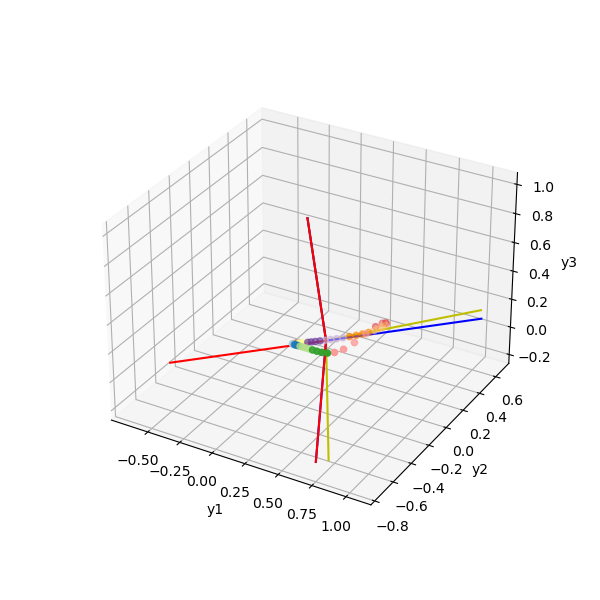

In [50]:
""" Plot of data and PC modes"""

fig = plt.figure(figsize=(6,6))

ax = plt.axes(projection='3d')
ax.scatter(y1, y2, y3, c=x, cmap='Paired', marker='o')

plt1 = PCAs_vects_sklearn
plt2 = Umanual
plt3 = Usvd
for i in range(3):
    ax.plot([plt1[0][i] + mean_x, mean_x],[plt1[1][i] + mean_y, mean_y],[plt1[2][i] + mean_z, mean_z], color = "y")
    ax.plot([plt2[0][i] + mean_x, mean_x],[plt2[1][i] + mean_y, mean_y],[plt2[2][i] + mean_z, mean_z], color = "b")
    ax.plot([plt3[0][i] + mean_x, mean_x],[plt3[1][i] + mean_y, mean_y],[plt3[2][i] + mean_z, mean_z], color = "r")

del plt1,plt2,plt3
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_zlabel('y3')

plt.show()

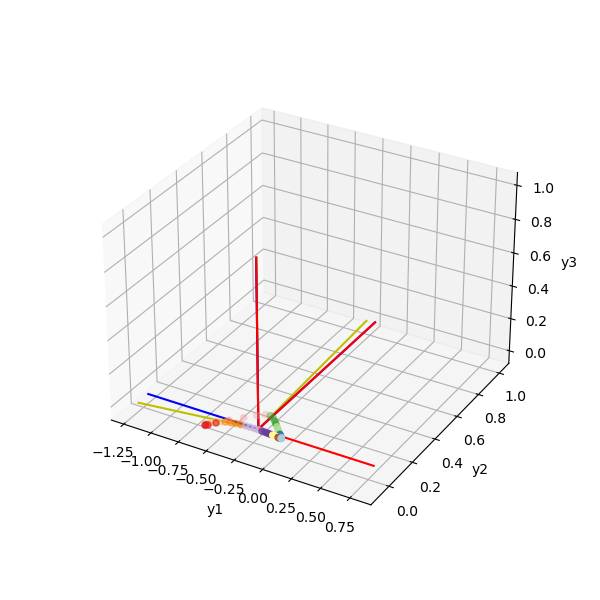

In [46]:
""" Plots of data and PC modes in rotated space """
plt.close()

NewDelta = np.matmul(np.transpose(Usvd),Delta)
new_mean_x = np.mean(NewDelta[0])
new_mean_y = np.mean(NewDelta[1])
new_mean_z = np.mean(NewDelta[2])

fig = plt.figure(figsize=(6,6))

ax = plt.axes(projection='3d')
ax.scatter(NewDelta[0], NewDelta[1], NewDelta[2], c=x, cmap='Paired', marker='o')

plt1 = np.matmul(np.transpose(Usvd),PCAs_vects_sklearn)
plt2 = np.matmul(np.transpose(Usvd),Umanual)
plt3 = np.matmul(np.transpose(Usvd),Usvd)

for i in range(3):
    ax.plot([plt1[0][i] + new_mean_x, new_mean_x],[plt1[1][i] + new_mean_y, new_mean_y],\
            [plt1[2][i] + new_mean_z, new_mean_z], color = "y")
    ax.plot([plt2[0][i] + new_mean_x, new_mean_x],[plt2[1][i] + new_mean_y, new_mean_y],\
            [plt2[2][i] + new_mean_z, new_mean_z], color = "b")
    ax.plot([plt3[0][i] + new_mean_x, new_mean_x],[plt3[1][i] + new_mean_y, new_mean_y],\
            [plt3[2][i] + new_mean_z, new_mean_z], color = "r")

del plt1,plt2,plt3
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_zlabel('y3')

plt.show()

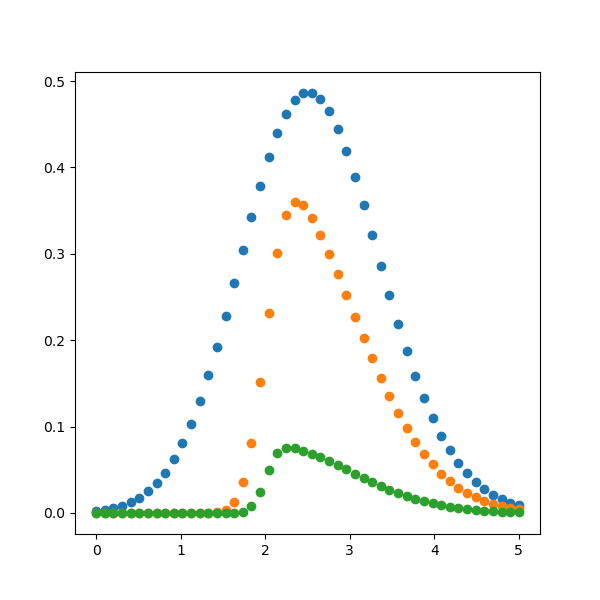

In [47]:
""" Plot initial datapoints """
%matplotlib widget
fig2 = plt.figure(figsize=(6,6))

for i in range(len(Delta)):
    plt.scatter(x, Delta[i])


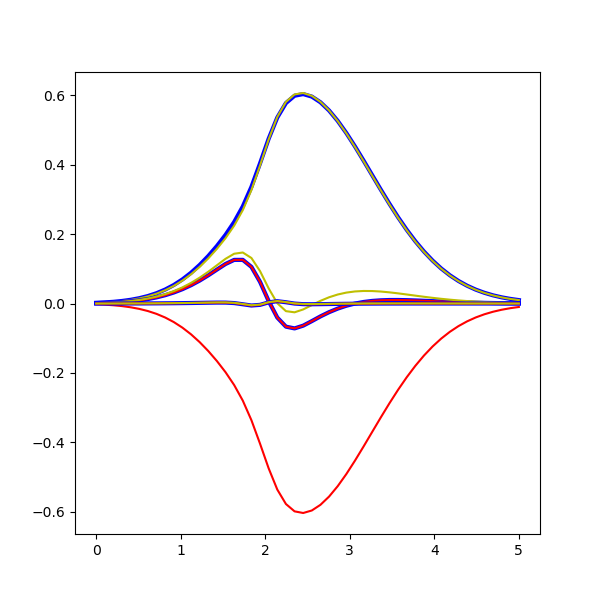

In [48]:
""" Plot of data in new frame using the three different methods"""

Data_manual = np.matmul(np.transpose(Umanual),Delta)
Data_SVD = np.matmul(np.transpose(Usvd),Delta)
Data_sk = np.matmul(np.transpose(PCAs_vects_sklearn),Delta)
fig3 = plt.figure(figsize=(6,6))

for i in range(3):
    plt.plot(x, Data_manual[i], color = "b", linewidth = 3)
    plt.plot(x, Data_SVD[i], color = "r")
    plt.plot(x, Data_sk[i], label = ("i = ",i), color = "y")


In [49]:
plt.close()